Data info: [here](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 0. Prepare data

In [2]:
!gdown 1tCq8wIW_nzuFJ7fNcgfiahAJTiImtQCT

Downloading...
From: https://drive.google.com/uc?id=1tCq8wIW_nzuFJ7fNcgfiahAJTiImtQCT
To: /content/mitbih_train.csv
100% 412M/412M [00:05<00:00, 70.7MB/s]


In [3]:
FILE_PATH = 'mitbih_train.csv'

In [4]:
df = pd.read_csv(FILE_PATH, header=None)

In [5]:
df.shape

(87554, 188)

# 1. EDA and Data processing

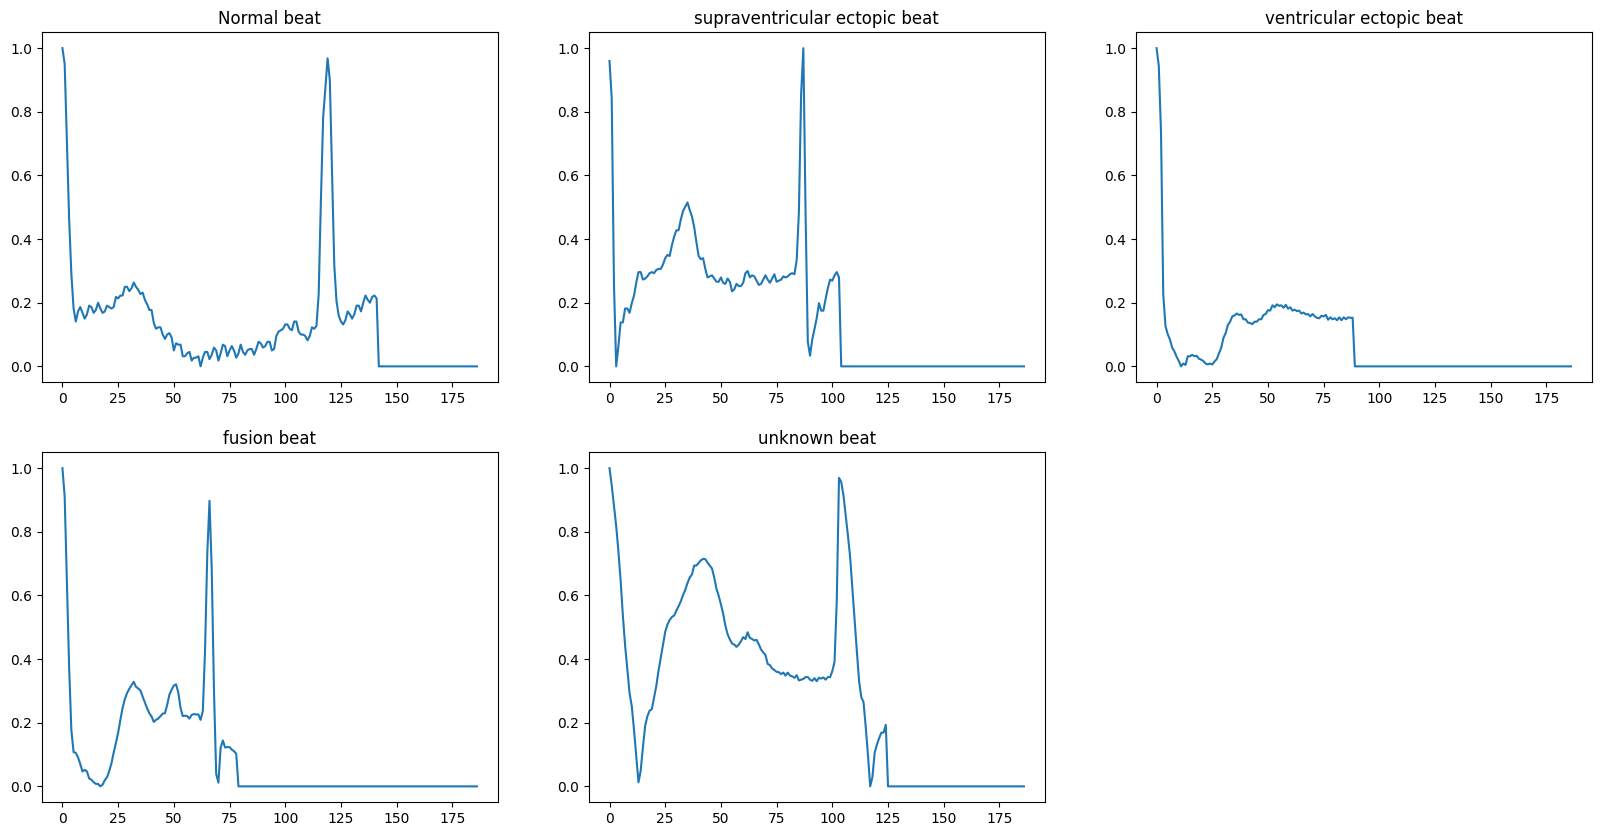

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot (range (0,187), (df.loc[df[187] ==0]).sample(1).iloc [:,:-1].values[0] )
plt.title ('Normal beat')

plt.subplot(2,3,2)
plt.plot ( (df.loc[df[187] ==1]).sample(1).iloc [:,:-1].values[0])
plt.title ('supraventricular ectopic beat')

plt.subplot(2,3,3)
plt.plot ( (df.loc[df[187] ==2]).sample(1).iloc [:,:-1].values[0])
plt.title ('ventricular ectopic beat')

plt.subplot(2,3,4)
plt.plot ( (df.loc[df[187] ==3]).sample(1).iloc [:,:-1].values[0])
plt.title ('fusion beat')

plt.subplot(2,3,5)
plt.plot ( (df.loc[df[187] ==4]).sample(1).iloc [:,:-1].values[0])
plt.title ('unknown beat')

plt.show()

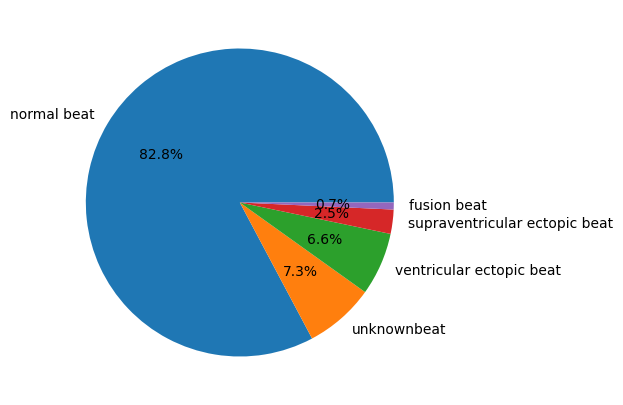

In [7]:
beats = ['normal beat', 'unknownbeat','ventricular ectopic beat', 'supraventricular ectopic beat', 'fusion beat' ]
plt.figure(figsize=(5, 5))
plt.pie(df[187].value_counts().values,labels = beats, autopct='%1.1f%%')
plt.show()

Oversampling

In [8]:
smote = SMOTE(sampling_strategy = 'all',random_state=42)
x = df.drop(columns = 187)
y = df[187]
x, y = smote.fit_resample(x,y)
df = pd.concat([x,y],axis = 1)

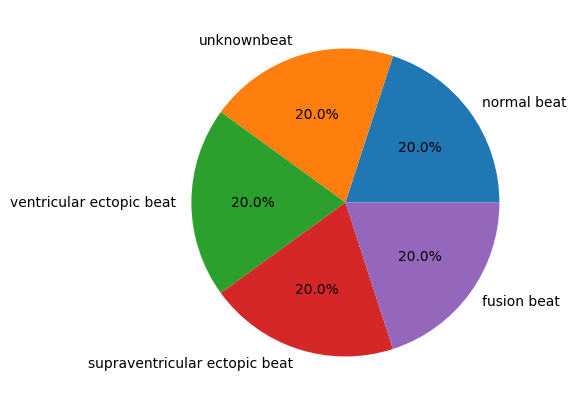

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df[187].value_counts().values,labels = beats, autopct = '%1.1f%%')
plt.show()

# 3. Train / Val Split

In [10]:
df[187] = df[187].astype(int)

In [11]:
TARGET_COL = 187

In [12]:
X = df[df.columns.drop(TARGET_COL)].values
y = df[[TARGET_COL]].values

In [13]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = VAL_RATIO, random_state = SEED)

# 4. Build Model and training

## Random Forest and Decision Tree

In [15]:
# Try to use different params
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train[:1000, :], y_train[:1000])

print(f"DONE")

DONE


In [19]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : np.squeeze(y_val),
                            "Predicted" : y_hat})
performance.head(10)

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,4,4
4,2,2
5,4,4
6,4,4
7,1,1
8,0,0
9,3,3


In [22]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.79
acc_val = 0.79


## RandomForest

Start import and use RandomForest here

In [23]:
# To Do

## SVM

In [25]:
# Try to use different params
model = svm.SVC()

In [26]:
model.fit(X_train[:1000, :], y_train[:1000])

print(f"DONE")

DONE


In [27]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : np.squeeze(y_val),
                            "Predicted" : y_hat})
performance.head(10)

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,4,0
4,2,2
5,4,4
6,4,4
7,1,1
8,0,0
9,3,3


In [28]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.81
acc_val = 0.81


In [54]:
model = XGBClassifier(learning_rate = 0.05, max_depth = 6, n_estimators = 5)

## XGBoost

In [55]:
model.fit(X_train[:1000, :], y_train[:1000])

print(f"DONE")

DONE


In [56]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : np.squeeze(y_val),
                            "Predicted" : y_hat})
performance.head(10)

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,4,2
4,2,2
5,4,4
6,4,4
7,1,1
8,0,1
9,3,3


In [57]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.81
acc_val = 0.81


# 5. Using GridSearchCV

In [34]:
parameters = {
  'learning_rate': [0.05, 0.1], #so called `eta` value
  'max_depth': [6, 10],
  'n_estimators': [5, 10]
}

In [37]:
model = XGBClassifier()

In [47]:
GRID_SEARCH_CV_CONFIG =  {
  "scoring": "accuracy",
  "cv": 5,
  "return_train_score": True,
  "refit": True
}

In [50]:
clf = GridSearchCV(model, parameters, n_jobs=5,
  **GRID_SEARCH_CV_CONFIG
)

In [51]:
clf.fit(X_train[:1000, :], y_train[:1000])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [6, 10],
                         'n_estimators': [5, 10]},
             return_train_score=True, scoring='accuracy')

In [58]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}

In [52]:
y_hat = clf.predict(X_val)

performance = pd.DataFrame({"Actual" : np.squeeze(y_val),
                            "Predicted" : y_hat})
performance.head(10)

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,4,4
4,2,2
5,4,4
6,4,4
7,1,1
8,0,1
9,3,3


In [53]:
# calculate acc
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_val = accuracy_score(y_val, clf.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.84
acc_val = 0.84


please read more how to code ML in real project [here](https://github.com/DatacollectorVN/ThinkPrompt-DS-Assigment/tree/master)